shape: (94, 314, 315)
dtype: uint16
dask.array<array, shape=(94, 314, 315), dtype=uint16, chunksize=(94, 157, 63), chunktype=numpy.ndarray>
chunk shape (94, 157, 63)
chunk shape (94, 157, 63)
chunk shape (94, 157, 63)
chunk shape (94, 157, 63)
chunk shape (94, 157, 63)
chunk shape (94, 157, 63)
chunk shape (94, 157, 63)
chunk shape (94, 157, 63)
chunk shape (94, 157, 63)
chunk shape (94, 157, 63)


<ipython-input-3-127bda6cec73>:35: UserWarning: newimages2/5.tif is a low contrast image
  io.imsave('newimages2/'+str(i)+'.tif', chunk)#saving chunks


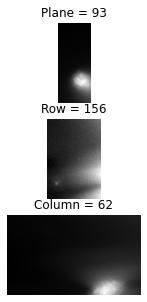

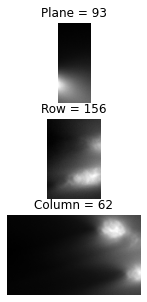

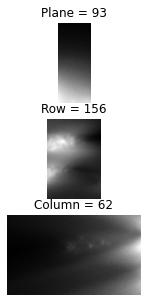

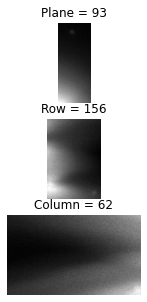

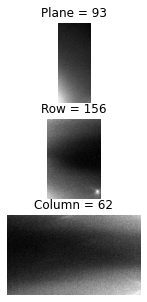

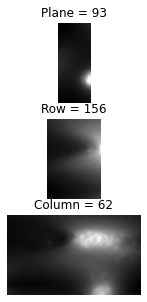

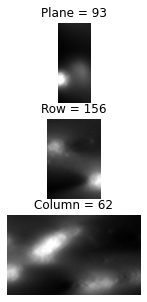

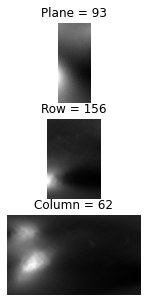

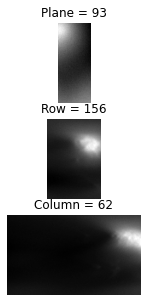

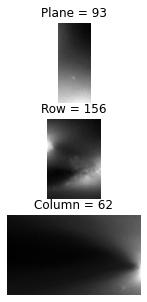

In [3]:
from skimage import (
    exposure, io
)
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
import toolz as tlz
import dask
import dask.array as da
%matplotlib inline

data = io.imread('/Users/amr/Documents/Asrar/PycharmProjects/Church Lab/img_chunk/3D Images/3mem_3m0_1-1 ROI 1_crop_crop_crop_Cy5.tif')#path to the 3d image tif file
#printing shape and data type
print("shape: {}".format(data.shape))
print("dtype: {}".format(data.dtype))
chunk_size = (94,157,63)#preferably divide across 1 single dimension ex:15 chunks of 94,314,21  rather than 2 dimensions makes it easier to stitch
# chunked dask array
arr = da.from_array(data.data, chunks=chunk_size)
print(arr)

def show_plane(ax, plane, cmap="gray", title=None):
    ax.imshow(plane, cmap=cmap)
    ax.axis("off")

    if title:
        ax.set_title(title)


i=1;

def info(chunk):
   global i
   if(chunk.shape[0]!=0):
    print("chunk shape", chunk.shape)
    io.imsave('newimages2/'+str(i)+'.tif', chunk)#saving chunks
    (n_plane, n_row, n_col) = chunk.shape
    _, (a, b, c) = plt.subplots(nrows=3, figsize=(15, 5))

    show_plane(a, chunk[n_plane-1], title=f'Plane = {n_plane-1}')
    show_plane(b, chunk[:, n_row-1, :], title=f'Row = {n_row-1}')
    show_plane(c, chunk[:, :, n_col-12], title=f'Column = {n_col-1}')
    i=i+1
    return chunk.data


    #NON OVERLAPPING
result_blocks = arr.map_blocks(info,dtype='uint16').compute(num_workers=1)   
   #OVERLAPPING replace below
#result_overlap = arr.map_overlap(info,depth=(6,6,6), boundary='reflect').compute(num_workers=1)





